<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
<ipython-input-6-fabdc54694bb>:28: RuntimeWarning: overflow encountered in exp
  res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x))

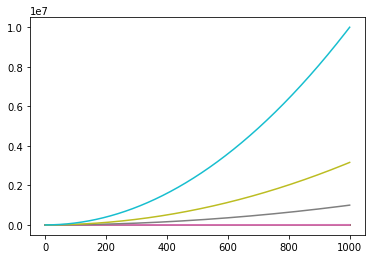

In [6]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

ws = np.exp(np.linspace(np.log(10 ** -20), np.log(1), 5))
stds = np.exp(np.linspace(np.log(1), np.log(10), 3))
x_0 = 0
x_1 = 1
mean = 0
utilities = ["l1", "l2"]
tolerance = 10 ** -20
eps = 0.3


def calculate_utility_loss(x, utility_loss_function):
    if utility_loss_function == "l2":
        return x * x
    elif utility_loss_function == "l1":
        return x


def privacy_loss(x_0, x_1, std, x):
    return ((x_1 - x_0) * (x_0 + x_1 - 2 * x)) / (2 * std * std)


def to_optimize(x, w_std, eps, utility, x_0, x_1, std):
    utility = calculate_utility_loss(x, utility)
    res = (w_std * utility) - np.minimum(1, np.exp(eps - privacy_loss(x_0, x_1, std, x)))
    return res


for utility_functions in utilities:
    for w in ws:
        for std in stds:
            w_std = w * std
            xs = np.linspace(0.0, 1000.0, 100000)
            y = [to_optimize(x, w_std, eps, utility_functions, x_0, x_1, std) for x in xs]
            plt.plot(xs, y)

# So: x-achse: x standardabweichung,  y_achse:
